In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import numpy as np 

In [3]:
data = pd.read_csv("Data\Rhodium.csv")

,Wavelength (pm),Intensity (mJy)
0,10.2419,0.0001
1,10.4837,0.0001
2,10.7256,0.0001
3,10.9675,0.0001
4,11.2093,0.0001
...,...,...
1194,299.0325,0.0036
1195,299.2744,0.0248
1196,299.5163,0.0035
1197,299.7581,0.0037


In [116]:
lambda_=data["Wavelength (pm)"].tolist()
intensidad= data["Intensity (mJy)"].tolist()

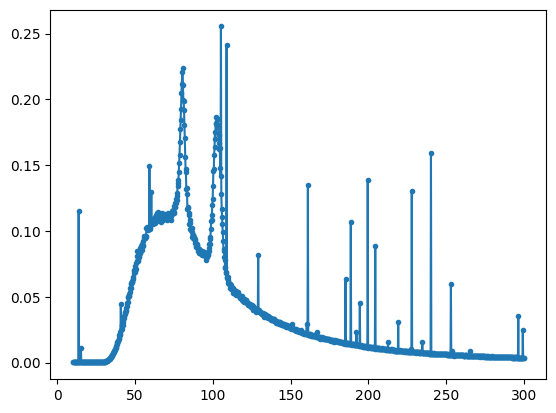

In [117]:
plt.plot(lambda_,intensidad,".-")

In [118]:
def filtrar(x,y,tolerancia=0.0060):
    x_nuevo= []
    y_nuevo= []
    n= len(x)
    for i in range (0,n-1):
        dato_estudio=y[i]
        dato_posterior=y[i+1]
        resta= abs(dato_estudio-dato_posterior)
        if resta < tolerancia:
            x_nuevo.append(x[i])
            y_nuevo.append(y[i])
    return x_nuevo,y_nuevo

In [119]:
lambda_filtro,intensidad_filtro= filtrar(lambda_,intensidad)

In [120]:
datos_elimininados= len(intensidad)-len(intensidad_filtro)
print(f"Datos eliminados: {datos_elimininados}")

Datos eliminados: 93


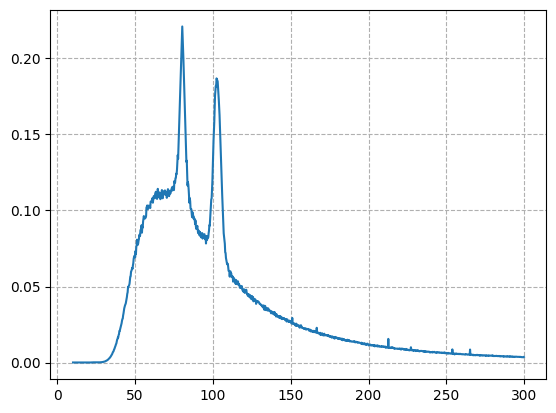

In [156]:
plt.plot(lambda_filtro,intensidad_filtro)
plt.grid(linestyle="--")


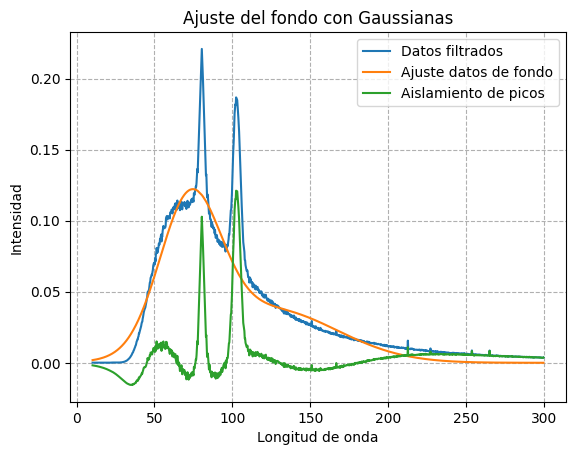

In [154]:
#Punto 1b 
def gaussianas(x, A1, mu1, sigma1,A2,mu2,sigma2):
    gauss1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    gauss1 = gauss1/ ((2*np.pi)**(1/2)*sigma1)
    gauss2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    gauss2 = gauss2 / ((2*np.pi)**(1/2)*sigma2)
    return gauss1+ gauss2

lambda_filtro=np.array(lambda_filtro)
intensidad_filtro = np.array(intensidad_filtro)

corte_picos = (
    (lambda_filtro< 75) |  
    ((lambda_filtro > 90) & (lambda_filtro < 95)) |  
    (lambda_filtro > 105) 
)

lambda_fondo= lambda_filtro[corte_picos]
intensidad_fondo= intensidad_filtro[corte_picos]

p0 = [0.1, 20, 20,0.04,200,55]
parametros, _ = curve_fit(gaussianas, lambda_fondo, intensidad_fondo, p0=p0)
ajuste_fondo= gaussianas(lambda_filtro, *parametros)
intensidad_sin_fondo= intensidad_filtro-ajuste_fondo

plt.plot(lambda_filtro,intensidad_filtro,label="Datos filtrados")
plt.plot(lambda_filtro,ajuste_fondo,label="Ajuste datos de fondo")
plt.plot(lambda_filtro,intensidad_sin_fondo,label="Aislamiento de picos")
plt.xlabel("Longitud de onda")
plt.ylabel("Intensidad")
plt.title("Ajuste del fondo con Gaussianas")
plt.grid(linestyle="--")
plt.legend()
plt.show()



In [9]:
#Punto 1c

In [10]:
def hallar_maximo(x_filtro,y_filtro):

    x = 0
    y = 0

    n= len(x_filtro)
    for i in range (0,n-1):
        dato_anterior=y_filtro[i-1]
        dato_estudio=y_filtro[i]
        dato_posterior=y_filtro[i+1]

        if dato_estudio > dato_anterior and dato_estudio > dato_posterior:

            x = x_filtro[i]
            y = y_filtro[i]

    return "El máximo local se encuentra en las coordenas "+ str((x,y))

                

In [11]:
print(hallar_maximo(x_filtro,y_filtro))

El máximo local se encuentra en las coordenas (298.3069, 0.0037)


In [12]:
def maximo_FWHM_fondo(x_,y_):

    x = pd.Series(x_)
    y = pd.Series(y_)

    posicion = y.idxmax()

    coordenada_x = float(x[posicion])

    coordenada_y = float(y[posicion])

    mitad = coordenada_y / 2

    candidatos = []

    n = len(y_)

    for i in range (0,n):

        dato_estudio = y_[i]

        if dato_estudio >= mitad:

            candidatos.append(i)
    
    x_inicial = float(x[candidatos[0]])
    x_final = float(x[candidatos[-1]])

    FWHM = x_final-x_inicial


    return "El máximo local se encuentra en las coordenadas:", (coordenada_x,coordenada_y), "y el ancho a media altura FWHM es: ", FWHM

In [13]:
print(maximo_FWHM_fondo(x_filtro,y_filtro))

('El máximo local se encuentra en las coordenadas:', (80.3837, 0.2209), 'y el ancho a media altura FWHM es: ', 42.8107)
